In [ ]:
!pip install fastai --upgrade --use-feature=2020-resolver


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --use-feature


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 26.8MB/s 
     |████████████████████████████████| 194kB 51.5MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 1.2MB 45.0MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *
from fastbook import *

In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [ ]:
(path/'training').ls()

(#10) [Path('training/1'),Path('training/4'),Path('training/7'),Path('training/3'),Path('training/8'),Path('training/5'),Path('training/6'),Path('training/2'),Path('training/0'),Path('training/9')]

In [ ]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y = parent_label,
                   splitter = GrandparentSplitter(train_name='training', valid_name='testing'))

In [ ]:
dls = dblock.dataloaders(path)

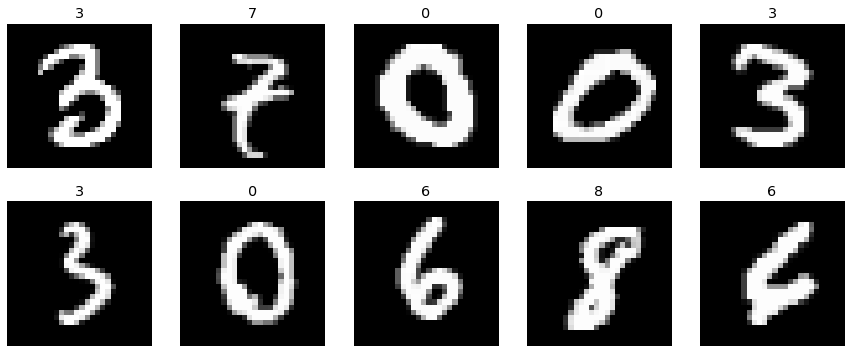

In [ ]:
dls.train.show_batch(max_n = 10, nrows=2)

In [ ]:
dls.loss_func

FlattenedLoss of CrossEntropyLoss()

In [ ]:
learn = cnn_learner(dls, resnet18, metrics = accuracy)

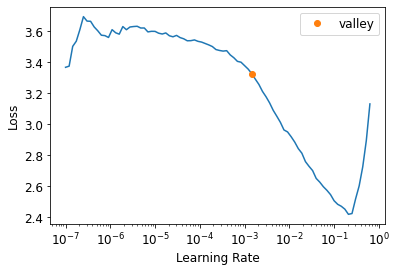

In [ ]:
lr_min = learn.lr_find()

In [ ]:
lr_min

SuggestedLRs(valley=tensor(0.0014))

In [ ]:
learn.fine_tune(3, base_lr= 0.0014)

epoch,train_loss,valid_loss,accuracy,time
0,0.780623,0.530121,0.829500,01:16


epoch,train_loss,valid_loss,accuracy,time
0,0.137176,0.075236,0.976600,01:21
1,0.080004,0.043596,0.986700,01:19
2,0.032838,0.037050,0.988500,01:19


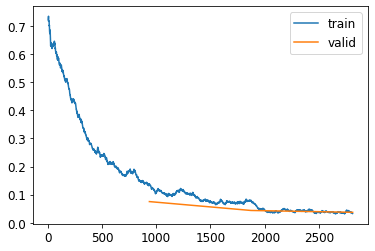

In [ ]:
learn.recorder.plot_loss()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

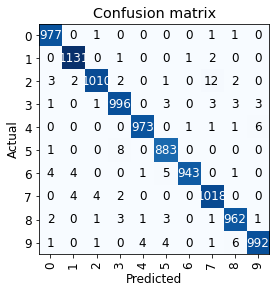

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
img = get_image_files(path/'testing')

In [ ]:
img = img[2000]

In [ ]:
img

Path('testing/4/5725.png')

In [ ]:
learn.predict(img)

('4',
 tensor(4),
 tensor([2.8898e-08, 1.3096e-06, 9.6095e-07, 1.0906e-07, 9.9996e-01, 4.7753e-08, 1.3817e-07, 3.1717e-05, 3.4729e-07, 6.7600e-07]))